In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Function to plot histogram of price
def DrawHistogram(variable_name):
    n, bins, patches = plt.hist(x=variable_name, bins=100, color='green', alpha=0.5)
    plt.ylabel('Frequency')
    maxfreq = n.max()

In [3]:
#### for suppressing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_data = pd.read_csv('python_files/house_sales_data.csv')
train_data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0.00,313000.000,3,1.500,1340,7912,1.500,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0.00,2384000.000,5,2.500,3650,9050,2.000,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0.00,342000.000,3,2.000,1930,11947,1.000,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0.00,420000.000,3,2.250,2000,8030,1.000,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0.00,550000.000,4,2.500,1940,10500,1.000,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
train_data.shape


(4600, 18)

In [5]:
train_data.nunique()


date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [6]:
train_data.duplicated().sum()


0

In [7]:
train_data=train_data.dropna()


In [8]:
train_data.isnull().sum()

#no null values present


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null int64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(3), int64(10), object(5)
memory usage: 682.8+ KB


In [10]:
train_data.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000
mean,551962.988,3.401,2.161,2139.347,14852.516,1.512,0.007,0.241,3.452,1827.265,312.082,1970.786,808.608
std,563834.703,0.909,0.784,963.207,35884.436,0.538,0.084,0.778,0.677,862.169,464.137,29.732,979.415
min,0.000,0.000,0.000,370.000,638.000,1.000,0.000,0.000,1.000,370.000,0.000,1900.000,0.000
25%,322875.000,3.000,1.750,1460.000,5000.750,1.000,0.000,0.000,3.000,1190.000,0.000,1951.000,0.000
50%,460943.462,3.000,2.250,1980.000,7683.000,1.500,0.000,0.000,3.000,1590.000,0.000,1976.000,0.000
75%,654962.500,4.000,2.500,2620.000,11001.250,2.000,0.000,0.000,4.000,2300.000,610.000,1997.000,1999.000
max,26590000.000,9.000,8.000,13540.000,1074218.000,3.500,1.000,4.000,5.000,9410.000,4820.000,2014.000,2014.000


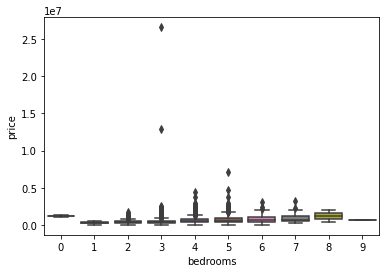

In [11]:
sns.boxplot(x= train_data['bedrooms'], y=train_data['price'])


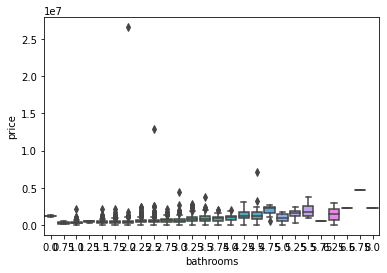

In [12]:
sns.boxplot(x= train_data['bathrooms'], y=train_data['price'])


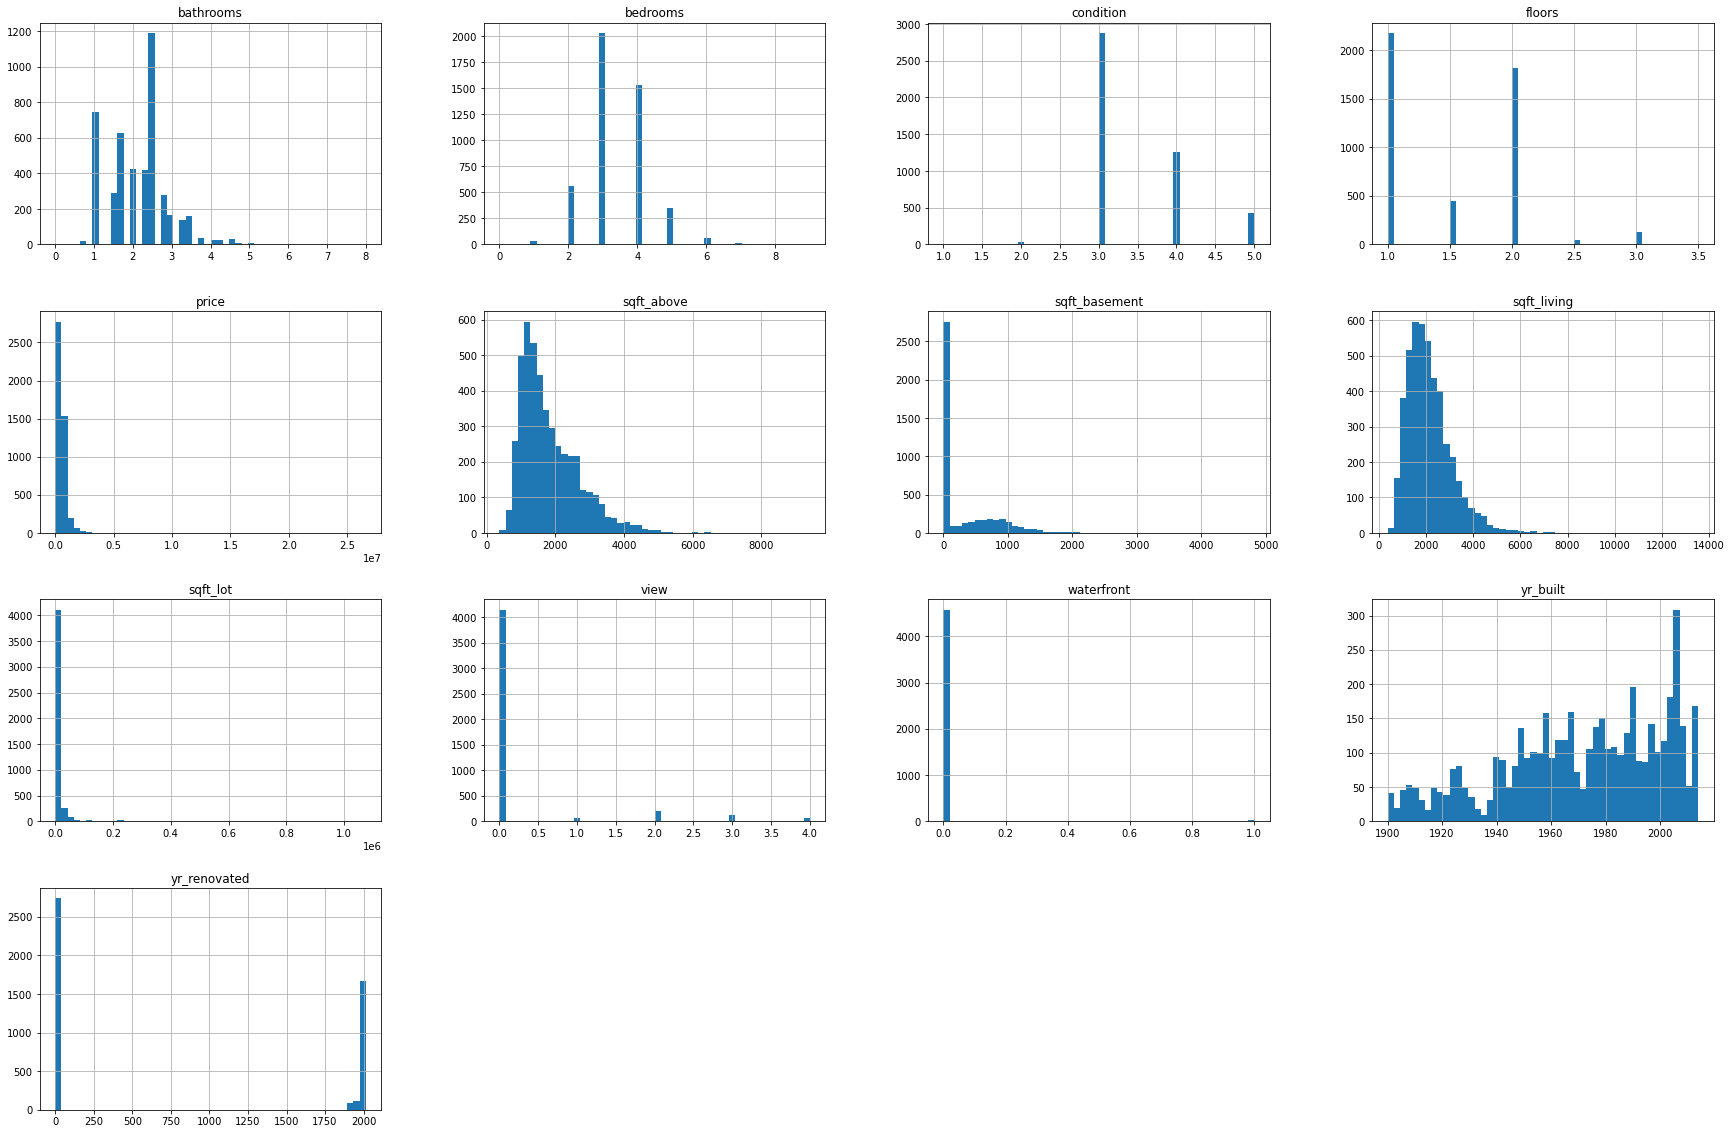

In [13]:
# Plot the histograms of each 
train_data.hist(bins=50, figsize=(30,20))
plt.show()

(array([[4.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.585e+03, 1.200e+01, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
        [4.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

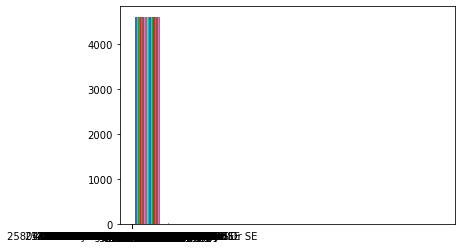

In [14]:
#train_data.price = np.log(train_data.price)
train_data[np.isfinite(train_data['price'])]
plt.hist(train_data[np.isfinite(train_data['price'])].values)

#DrawHistogram(train_data.price)
#plt.xlabel('price')

In [15]:
train_data.price.describe()


count       4600.000
mean      551962.988
std       563834.703
min            0.000
25%       322875.000
50%       460943.462
75%       654962.500
max     26590000.000
Name: price, dtype: float64

In [16]:
train_data.shape


(4600, 18)

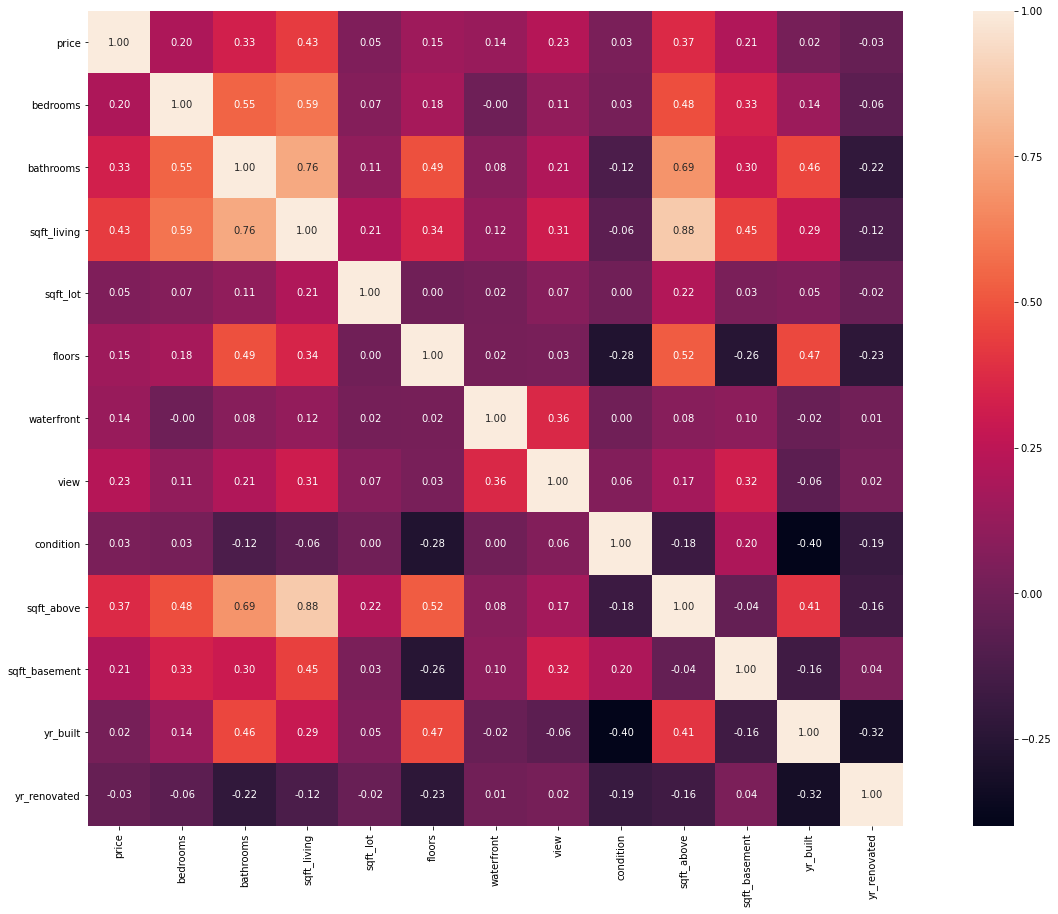

In [17]:
#price correlation matrix
corrmat =train_data.corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')

In [18]:
corr_matrix = train_data.corr()
cor_target=abs(corr_matrix["price"]).sort_values(ascending=False)
cor_target


price           1.000
sqft_living     0.430
sqft_above      0.368
bathrooms       0.327
view            0.229
sqft_basement   0.210
bedrooms        0.200
floors          0.151
waterfront      0.136
sqft_lot        0.050
condition       0.035
yr_renovated    0.029
yr_built        0.022
Name: price, dtype: float64

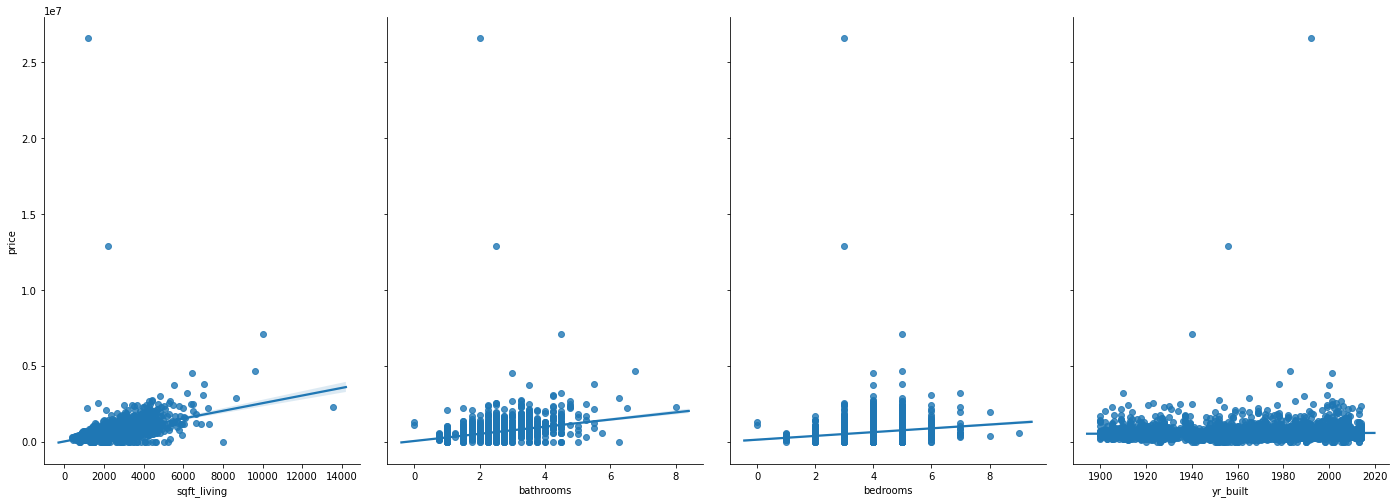

In [19]:
sns.pairplot(train_data, x_vars=['sqft_living','bathrooms','bedrooms','yr_built'], y_vars='price', size=7, aspect=0.7, kind='reg')


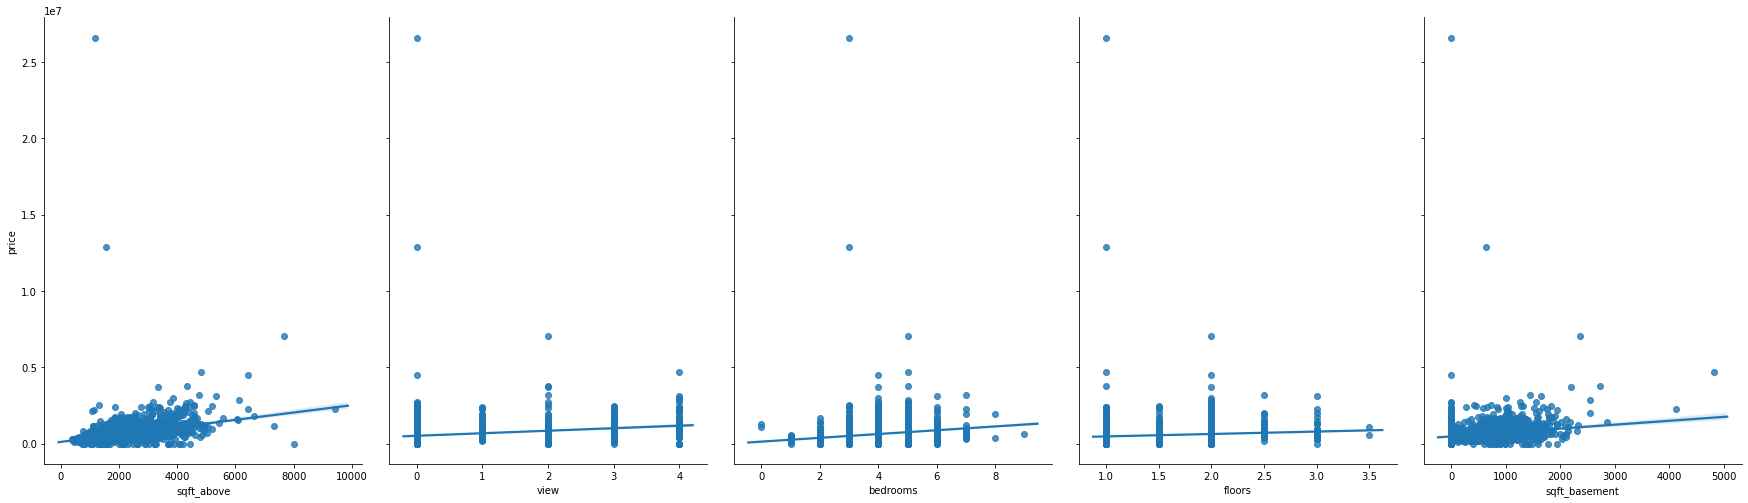

In [20]:
sns.pairplot(train_data, x_vars=['sqft_above','view','bedrooms','floors','sqft_basement'], y_vars='price', size=7, aspect=0.7, kind='reg')


In [21]:
main_features1 = ['view','bedrooms','bathrooms','floors',]

X1 = train_data[main_features1]
y1 = train_data.price


In [22]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=0)


In [23]:
#Initialize Linear Regression variable
LinearRegression1 = linear_model.LinearRegression()
LinearRegression1.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
def printStatistics(df1,df2):
    mse=mean_squared_error(df1,(df2))
    print("Mean squared error:"+ str(mse))
    rmse = np.sqrt(mean_squared_error(df1,(df2)))
    print("Root mean squared logarithmic error: "+ str(rmse))
    r_squared = r2_score(df1,df2)
    print("R-squared value: "+ str(r_squared))
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df2,y=df1)

Mean squared error:105023120901.8118
Root mean squared logarithmic error: 324072.70928267285
R-squared value: 0.2901369355989383


'Accuracy: 29%'

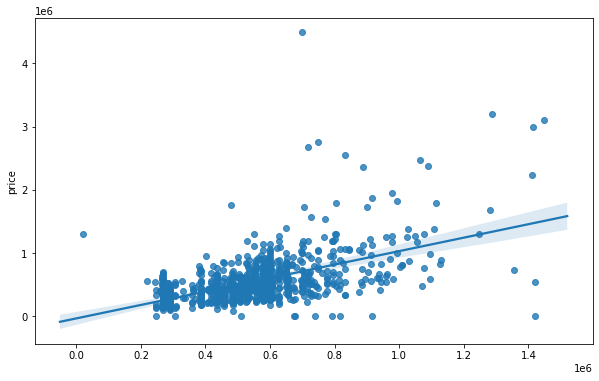

In [25]:
#Linear Regression


predictions1 = LinearRegression1.predict(X_test1)
printStatistics(y_test1,predictions1)
accuracy = LinearRegression1.score(X_test1, y_test1)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [26]:
#Evaluation
scores = cross_val_score( LinearRegression1, X1, y1, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.3184410347538809


In [27]:
#Selecting highly correlated features
relevant_features2 = cor_target[cor_target>0.2]
relevant_features2

price           1.000
sqft_living     0.430
sqft_above      0.368
bathrooms       0.327
view            0.229
sqft_basement   0.210
bedrooms        0.200
Name: price, dtype: float64

In [28]:
main_features2 = ['sqft_living','sqft_lot','floors','bathrooms','view','bedrooms',
                  'sqft_basement','waterfront']
X2 = train_data[main_features2]
y2 = train_data.price

In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=0)


In [30]:
#no of features
nof_list=np.arange(1,12)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train2,y_train2)
    X_test_rfe = rfe.transform(X_test2)
    model.fit(X_train_rfe,y_train2)
    score = model.score(X_test_rfe,y_test2)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score with 9 features: 0.509845


In [31]:
cols = list(X_train2.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 11)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X2,y2)  
#Fitting the data to model
model.fit(X_rfe,y2)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['sqft_living', 'sqft_lot', 'floors', 'bathrooms', 'view', 'bedrooms',
       'sqft_basement', 'waterfront', 'floors'],
      dtype='object')


In [32]:
main_features3 = ['sqft_living', 'sqft_lot', 'floors', 'bathrooms', 'view', 'bedrooms',
       'sqft_basement', 'waterfront', 'floors']
X3 = train_data[main_features3]
y3 = train_data.price

In [33]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=0)


In [34]:
#complex linear regression

#Initialize Linear Regression variable
LinearRegression2 = linear_model.LinearRegression()
LinearRegression2.fit(X_train3,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Mean squared error:72517655243.8513
Root mean squared logarithmic error: 269291.02332579024
R-squared value: 0.5098450271468561


'Accuracy: 51%'

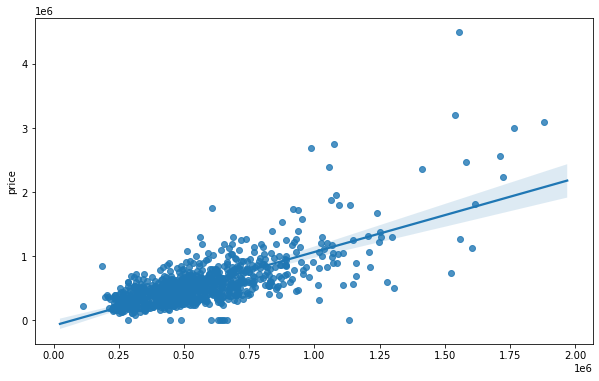

In [35]:

predictions2 = LinearRegression2.predict(X_test3)
printStatistics(y_test3,predictions2)
accuracy = LinearRegression2.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [36]:
scores = cross_val_score( LinearRegression2, X3, y3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())


The avergae accuracy with 10 fold cross validation is:  0.49060851489555934


Mean squared error:72829626023.08455
Root mean squared logarithmic error: 269869.64635372494
R-squared value: 0.5077363816271983


'Accuracy: 51%'

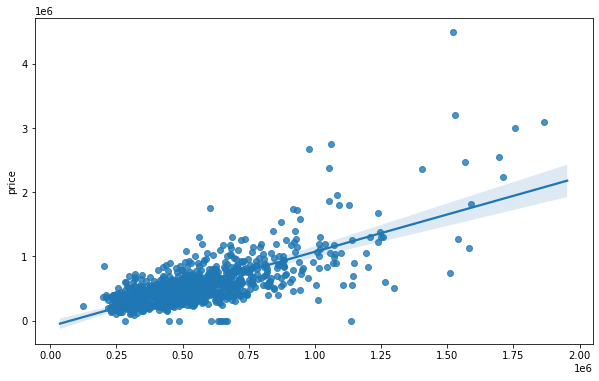

In [37]:
#ridge regresssion
ridgeReg = Ridge(alpha=0.01, normalize=True)
ridgeReg.fit(X_train3,y_train3)
predictions3 = ridgeReg.predict(X_test3)
printStatistics(y_test3,predictions3)
accuracy = ridgeReg.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [38]:
scores = cross_val_score( ridgeReg, X3, y3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.48983149945649374


Mean squared error:78038758845.41124
Root mean squared logarithmic error: 279354.18172171904
R-squared value: 0.47252726808746537


'Accuracy: 47%'

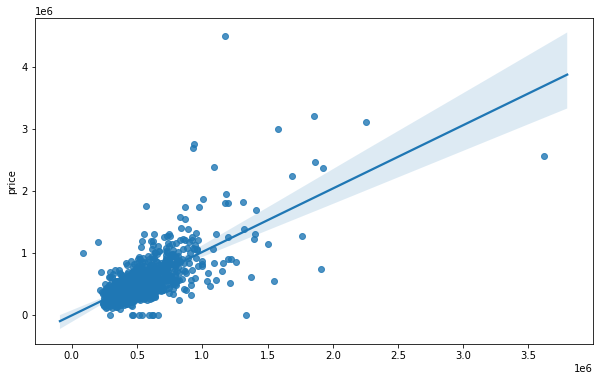

In [39]:
from sklearn.preprocessing import PolynomialFeatures
# Quadratic
poly = PolynomialFeatures(degree=2)
X_train4 = poly.fit_transform(X_train3)
X_test4 = poly.fit_transform(X_test3)
QuadraticPolynomial = LinearRegression2.fit(X_train4, y_train3)
predictions4 = QuadraticPolynomial.predict(X_test4)
printStatistics(y_test3,predictions4)
accuracy = QuadraticPolynomial.score(X_test4, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [40]:
predictions4


array([ 520527.26434695,  606716.46075331,  272418.49129828,
        615023.28607205,  747717.58195156,  272143.66921941,
        594291.53874972,  318764.10629045,  449102.71044733,
       1193428.7183994 ,  593911.05727751,  483364.42110993,
        903264.98149487,  558491.39699258,  609691.27348688,
        240185.38946682,  416596.31176709,  441543.44994938,
        832565.67436268,  377036.42302386,  415869.60341601,
        866685.95725047,  287918.62838631,  445425.44192769,
        556630.06631191,  455821.31839669,  618176.50766645,
        576171.71661603,  306426.00874963,  640124.46203543,
        637289.83390188,  400712.43876365,  425613.94392444,
        605408.88969767,  385731.46088044,  504414.68370459,
        493008.12699452,  505564.38499013,  295599.99144897,
        582335.21224863,  614542.76978121,  436107.1986864 ,
        352516.73823045,  762425.22642887,  284953.69135026,
        631474.29315923,  861111.12755235,  771324.24117174,
        682466.71795292,

In [41]:

scores = cross_val_score(QuadraticPolynomial, X_train4, y_train3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())



The avergae accuracy with 10 fold cross validation is:  0.3445117913993453


Mean squared error:72517659128.03911
Root mean squared logarithmic error: 269291.03053766774
R-squared value: 0.5098450008931947


'Accuracy: 51%'

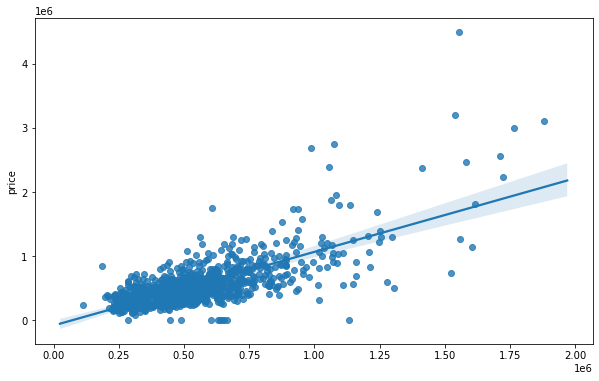

In [42]:
#lasso regression
lasso = Lasso(alpha=0.01)
lassoModel=lasso.fit(X_train3,y_train3)
predictions_lasso = lassoModel.predict(X_test3)
printStatistics(y_test3,predictions_lasso)
accuracy = lassoModel.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [43]:
scores = cross_val_score(lassoModel, X_train3, y_train3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.36894950299300844


In [44]:
X_whole_features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement','yr_built', 'yr_renovated']

In [45]:
X_whole = train_data[X_whole_features]
y_whole = train_data.price

In [46]:
import statsmodels.api as sm
#Backward Elimination
cols = list(X_whole.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_whole[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_whole,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built']


In [47]:
X_whole_features1=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built']

In [48]:
X_whole = train_data[X_whole_features1]
y_whole = train_data.price

In [49]:
X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(X_whole, y_whole, test_size=0.20, random_state=0)


In [50]:
y_test_whole.describe

<bound method NDFrame.describe of 991     289000.000
2824    429900.000
1906    129000.000
1471    600000.000
1813   1298000.000
           ...    
1533    264000.000
463     324000.000
4415     83300.000
1927    520000.000
2477    215000.000
Name: price, Length: 920, dtype: float64>

In [51]:

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "files/summary.png")